In [1]:
import sys

sys.path.append("/Users/rohith_medam/Projects/Portfolio Optimization/Scripts")
import user_def_fncs
import plots


In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
import yfinance as yf

In [5]:
import warnings

warnings.filterwarnings("ignore")

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", 100)

In [7]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

In [8]:
config_params = {
    "Tickers": [
        # Technology
        "AAPL",
        "MSFT",
        "GOOGL",
        "AMZN",
        "TSLA",
        "NVDA",
        "META",
        # Financial
        "BRK-B",
        "JPM",
        "V",
        # Healthcare
        "JNJ",
        "LLY",
        "UNH",
        # Consumer Discretionary
        "PG",
        "WMT",
        "COST",
        # Energy
        "XOM",
        "CVX",
        # Benchmark
        "SPY",
    ],
    "start_date": "2015-01-01",
    "end_date": "2026-01-01",
    "risk_free_rate": 4.18,
    # "rebalance_frequency": "quarterly",
    # "transaction_cost": 0.0015,
    # "train_test_split": 0.8,
    # "validation_split": 0.2,
    # "radom_seed": 42,
}

In [9]:
raw_data = user_def_fncs.download_data(
    tickers=config_params["Tickers"],
    start_date=config_params["start_date"],
    end_date=config_params["end_date"],
)

raw_data

Tickers: AAPL, MSFT, GOOGL, AMZN, TSLA, NVDA, META, BRK-B, JPM, V, JNJ, LLY, UNH, PG, WMT, COST, XOM, CVX, SPY


[*********************100%***********************]  19 of 19 completed


Ticker            TSLA                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2015-01-02   14.858000   14.883333   14.217333   14.620667  71466000   
2015-01-05   14.303333   14.433333   13.810667   14.006000  80527500   
2015-01-06   14.004000   14.280000   13.614000   14.085333  93928500   
2015-01-07   14.223333   14.318667   13.985333   14.063333  44526000   
2015-01-08   14.187333   14.253333   14.000667   14.041333  51637500   
...                ...         ...         ...         ...       ...   
2025-12-24  488.480011  490.899994  476.799988  485.399994  41285400   
2025-12-26  485.230011  489.089996  473.820007  475.190002  58780700   
2025-12-29  469.000000  469.399994  459.000000  459.640015  66263000   
2025-12-30  461.089996  463.119995  453.829987  454.429993  59238500   
2025-12-31  456.100006  456.549988  449.299988  449.720001  49078000   

Ticker            COST                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2015-01-02  114.345554  115.377218  113.491208  114.136002  1471000   
2015-01-05  114.200501  114.579317  112.677184  112.838379  1748500   
2015-01-06  113.330060  115.208015  112.717513  114.329491  3185200   
2015-01-07  114.933981  116.408929  114.740539  116.320282  2171600   
2015-01-08  117.319702  117.754943  116.819993  117.319702  2937700   
...                ...         ...         ...         ...      ...   
2025-12-24  858.599976  876.000000  858.349976  871.859985  1822200   
2025-12-26  870.640015  877.590027  869.000000  873.349976  1324100   
2025-12-29  873.289978  874.500000  865.690002  867.840027  1792500   
2025-12-30  864.000000  867.820007  861.429993  865.650024  1680800   
2025-12-31  864.580017  868.000000  861.340027  862.340027  1490000   

Ticker             UNH                                               \
Price             Open        High         Low       Close   Volume   
Date                                                                  
2015-01-02   85.084045   86.022905   83.835029   84.480492  3060900   
2015-01-05   84.078113   84.203848   82.778798   83.088959  4679000   
2015-01-06   83.684105   83.943966   82.535678   82.921280  3468300   
2015-01-07   82.954840   84.078120   82.921309   83.767960  3225800   
2015-01-08   85.142693   88.001184   84.430169   87.766464  5346100   
...                ...         ...         ...         ...      ...   
2025-12-24  325.200012  328.989990  324.130005  327.579987  2842700   
2025-12-26  327.200012  331.890015  326.260010  331.829987  4359300   
2025-12-29  330.890015  334.250000  328.279999  328.940002  4346800   
2025-12-30  329.730011  336.149994  329.510010  332.160004  4432500   
2025-12-31  332.320007  333.329987  329.880005  330.109985  4285200   

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2015-01-02   39.773216   40.421043   39.670929   39.858456  27913900   
2015-01-05   39.526010   39.832877   39.423723   39.491917  39673900   
2015-01-06   39.534556   39.849945   38.818535   38.912300  36447900   
2015-01-07   39.193584   39.602738   38.775907   39.406685  29114100   
2015-01-08   39.849932   40.702337   39.824361   40.565952  29645200   
...                ...         ...         ...         ...       ...   
2025-12-24  485.679993  489.160004  484.829987  488.019989   5855900   
2025-12-26  486.709991  488.119995  485.959991  487.709991   8842200   
2025-12-29  484.859985  488.350006  484.179993  487.100006  10893400   
2025-12-30  485.929993  489.679993  485.500000  487.480011  13944500   
2025-12-31  487.839996  488.140015  483.299988  483.619995  15601

In [10]:
processed_data = user_def_fncs.process_raw_data(raw_data, config_params["Tickers"])

Processed data:
Prices shape: (2766, 19)
Returns shape: (2765, 19)
Missing values in prices: 0
Missing values in returns: 0


In [11]:
prices = processed_data["prices"]
volume = processed_data["volume"]
returns = processed_data["returns"]

In [12]:
summary_stats = user_def_fncs.summary_stats(
    returns=returns, prices=prices, risk_free_rate=config_params["risk_free_rate"]
)

In [13]:
%%capture

corr_matrix = user_def_fncs.correlation_analysis(returns)
corr_matrix

In [14]:
is_valid = user_def_fncs.data_validation(returns, prices)

No missing values in returns
No missing values in prices
No extreme returns found


In [15]:
user_def_fncs.data_write(
    prices_data=prices,
    returns_data=returns,
    volume_data=volume,
    summary_stats_data=summary_stats,
    folder_name="Data",
    date_format="%Y-%m-%d",
)

Prices dataframe saved to /Users/rohith_medam/Projects/Portfolio Optimization/Data as a .csv file
Returns dataframe saved to /Users/rohith_medam/Projects/Portfolio Optimization/Data as a .csv file
Volume dataframe saved to /Users/rohith_medam/Projects/Portfolio Optimization/Data as a .csv file
Summary dataframe saved to /Users/rohith_medam/Projects/Portfolio Optimization/Data as a .csv file
Dataframes saved to /Users/rohith_medam/Projects/Portfolio Optimization/Data as an excel file


Visualization

Correlation matrix image saved to /Users/rohith_medam/Projects/Portfolio Optimization/Images


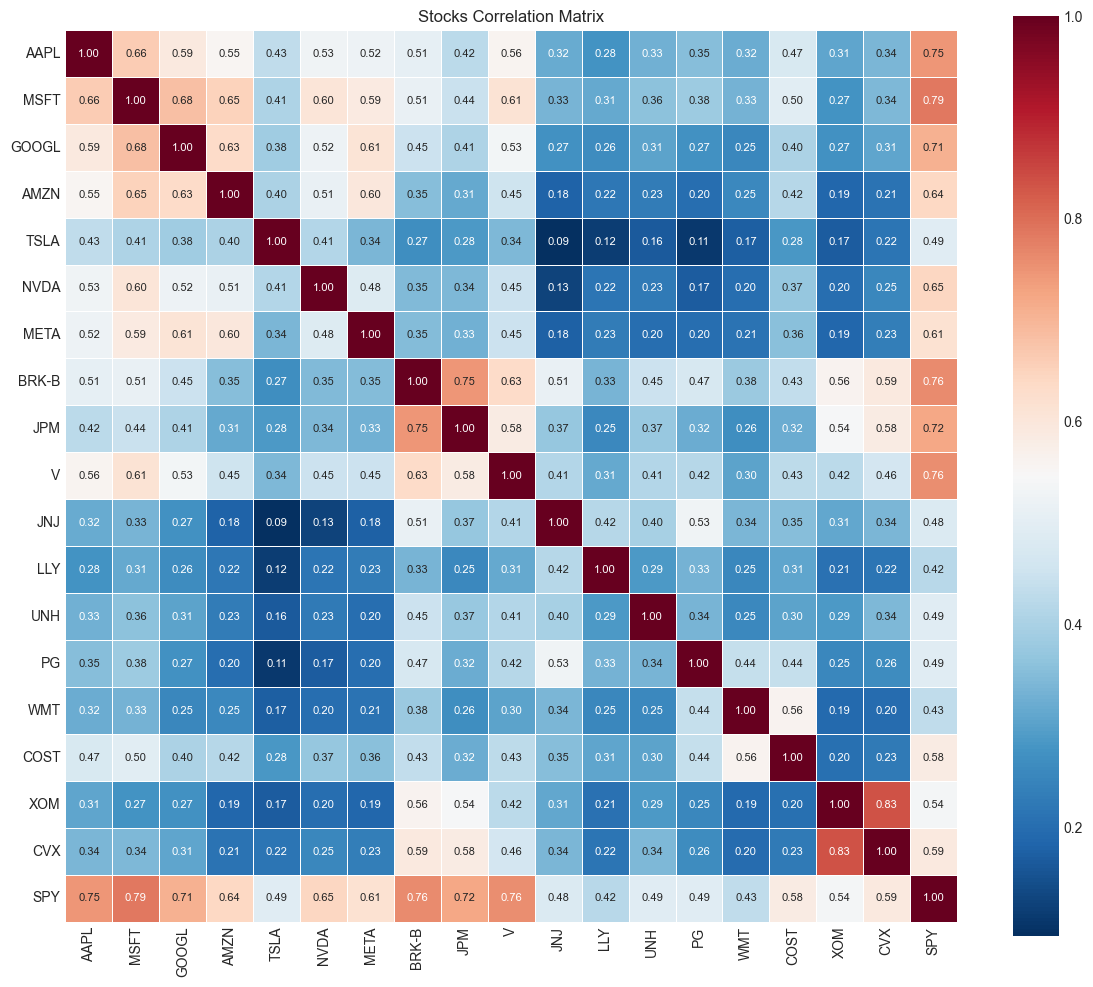

In [16]:
# Correlation Matrix

plots.plot_correlation_heatmap(
    correlation_matrix=corr_matrix, folder_to_save="Images", file_name="corr_matrix.png"
)